### Load/Export Data to CSV

In [106]:
#Load relevant packages
import seaborn as sns
import os
#Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
#Export the dataset to a CSV file and store in the Data folder
file_path = os.path.abspath(os.path.join(os.getcwd(), "../../", "Data"))
titanic.to_csv(os.path.join(file_path, "titanic_seaborn_data.csv"), index=False)

### Package Installation

In [107]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")


In [108]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [109]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [110]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [111]:
#Count the number of missing values in the dataset as a percentage
titanic.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [112]:
#Display the value counts of the 'age' column
titanic['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [113]:
#Calculate the mean of the 'age' column for each pclass
titanic.groupby('pclass')['age'].mean()
age_pclass1 = titanic[titanic['pclass'] == 1]['age'].mean()
age_pclass2 = titanic[titanic['pclass'] == 2]['age'].mean()
age_pclass3 = titanic[titanic['pclass'] == 3]['age'].mean()

In [114]:
#Fill missing values in the 'age' column with the mean age of each pclass
titanic['age'] = np.where((titanic['pclass'] == 1) & (titanic['age'].isnull()), age_pclass1, titanic['age'])
titanic['age'] = np.where((titanic['pclass'] == 2) & (titanic['age'].isnull()), age_pclass2, titanic['age'])
titanic['age'] = np.where((titanic['pclass'] == 3) & (titanic['age'].isnull()), age_pclass3, titanic['age'])

In [115]:
#Count the number of missing values in the dataset as a percentage
titanic.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [116]:
#Drop rows where 'embarked' is missing
titanic.dropna(subset=['embarked'], inplace=True)

In [117]:
#Count the number of missing values in the dataset as a percentage
titanic.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.000000
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.390326
embark_town     0.000000
alive           0.000000
alone           0.000000
dtype: float64

## Accurate Visualizations

### Age and Survival Rate

#### Find Optimal Bin Size

In [118]:
#Use Rice Rule to determine number of bins
rice_bins = np.ceil(2 * np.cbrt(len(titanic)))
rice_bins

np.float64(20.0)

In [119]:
#Use Freedman-Diaconis Rule to determine number of bins
bin_width = 2*((np.percentile(titanic['age'], 75) - np.percentile(titanic['age'], 25))/ np.cbrt(len(titanic)))
fd_bins = int(np.ceil((max(titanic['age']) - min(titanic['age']))/bin_width))
fd_bins

27

In [120]:
#Use Sturges' Rule to determine an appropriate number of bins
sturges_bin = np.ceil(np.log2(len(titanic['age'])) + 1)
sturges_bin

np.float64(11.0)

In [121]:
#Manually set bin sizes
age_min = int(titanic['age'].min())
age_max = int(titanic['age'].max())
bins = bins_3_year = list(range(age_min, age_max + 4, 3))
len(bins_3_year)

28

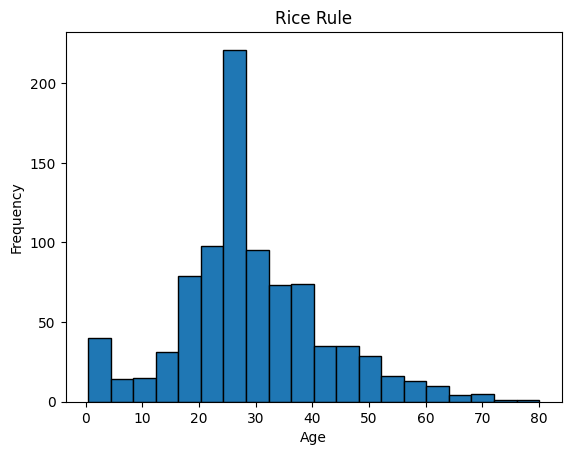

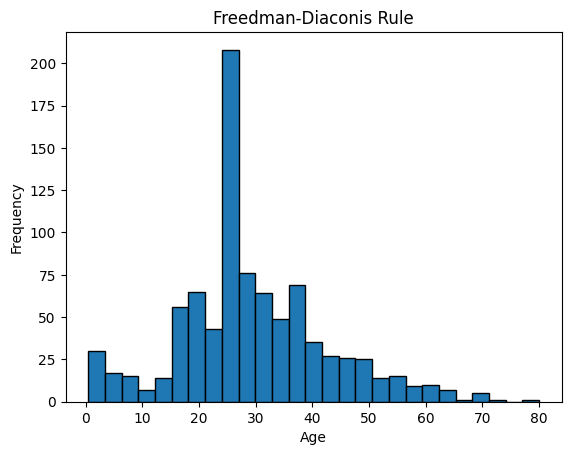

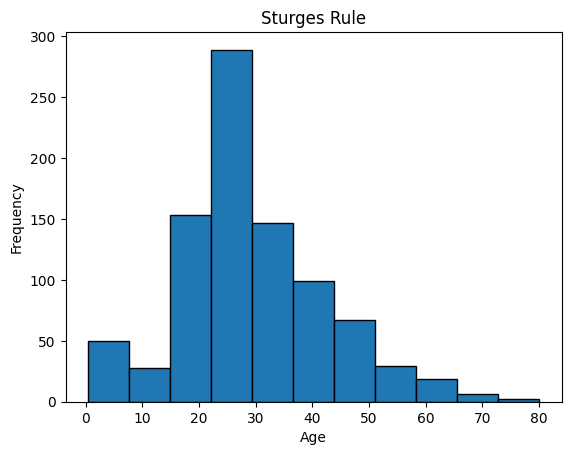

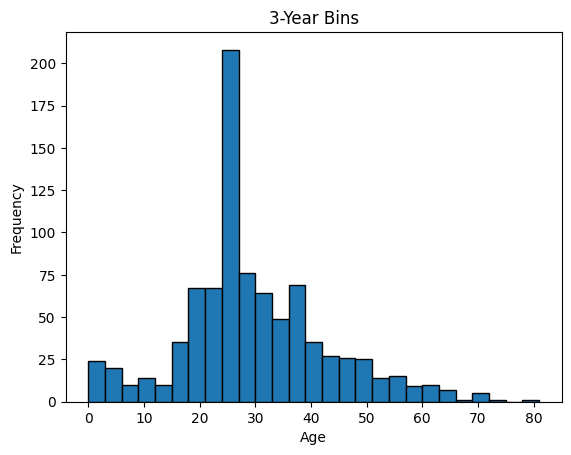

In [122]:
#Create a list of titles
titles = ['Rice Rule', 'Freedman-Diaconis Rule', 'Sturges Rule', '3-Year Bins']
#Plot the histograms for the different bin sizes
for i, bins in enumerate([int(rice_bins), int(fd_bins), int(sturges_bin), bins_3_year]):
    plt.hist(titanic['age'], bins=bins, edgecolor='black')
    plt.title(titles[i])
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

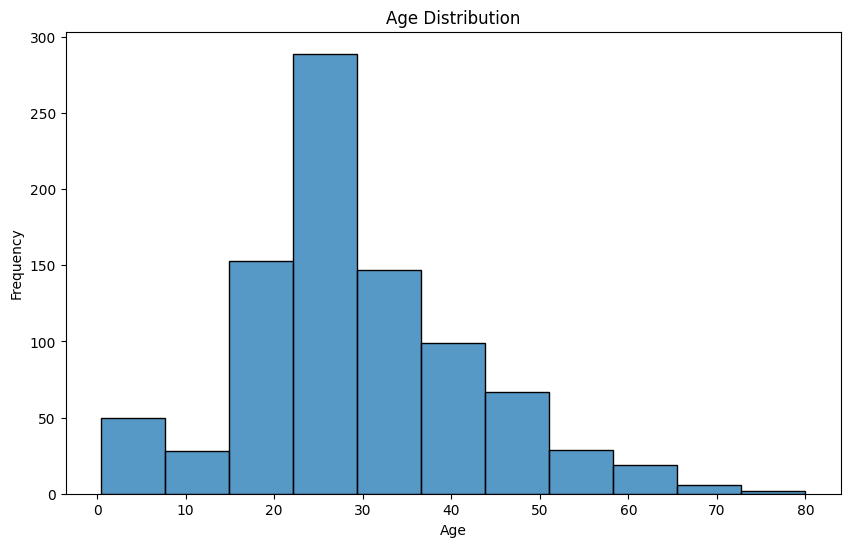

In [123]:
#Visualize the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=int(sturges_bin))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

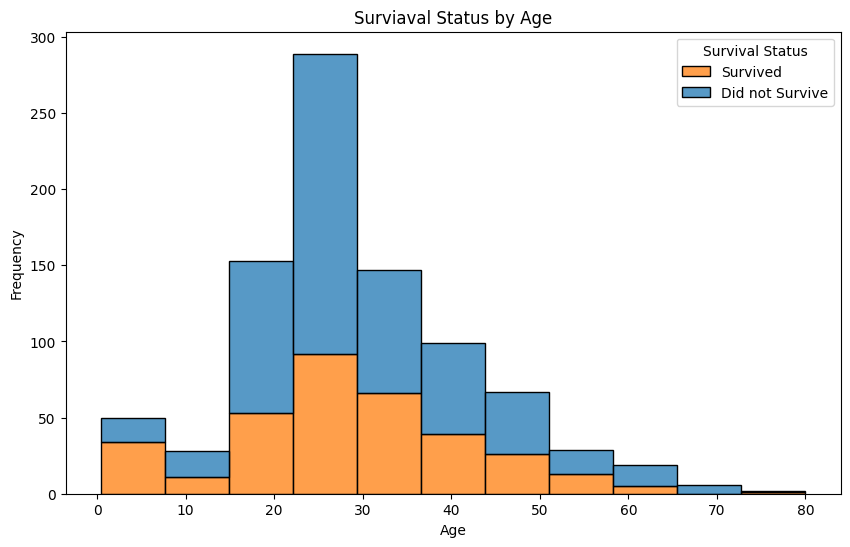

In [177]:
#Visualize the age distribution with 'score_text' as hue
plt.figure(figsize=(10, 6))
sns.histplot(titanic, x='age', hue='survived', bins = int(sturges_bin), multiple='stack')
plt.title('Surviaval Status by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title="Survival Status", labels=["Survived", "Did not Survive"])
plt.show()


In [127]:
#Display the counts of 'survived' for each age group
age_bins = pd.cut(titanic['age'], bins=int(sturges_bin))
age_survived = titanic.groupby(age_bins, observed=False)['survived'].value_counts().unstack()
age_survived.columns = ['Not Survived', 'Survived']
age_survived['Survival Rate'] = np.round(age_survived['Survived'] / (age_survived['Survived'] + age_survived['Not Survived']) * 100, 2)
age_survived

,Not Survived,Survived,Survival Rate
age,,,
"(0.34, 7.655]",16,34,68.00
"(7.655, 14.889]",17,11,39.29
"(14.889, 22.124]",100,53,34.64
"(22.124, 29.358]",197,92,31.83
"(29.358, 36.593]",81,66,44.90
"(36.593, 43.827]",60,39,39.39
"(43.827, 51.062]",41,26,38.81
"(51.062, 58.296]",16,13,44.83
"(58.296, 65.531]",14,5,26.32


To start analysis of age, I chose to find the optimal bin size using different methods. Based on the resulting plots, I chose to use 11 bins for the age data based on Sturges' Rule. From the stacked histogram, we can observe that in each bin a small percentage of passengers survived. Overall the data is slightly right-skewed with the most prevalent age group being 22 to 29 years old (200 passengers). The plot is visually appealing with it clear legends, axis labels, and title. Viewers can easily distinguish between the two categories of survival as it relates to the wider population of passengers in each age group since the number of surviving passengers is less than the total passengers present; each bar encompasses the total subpopulation of passengers when adding survival status.

### Distribution of Age and Pclass by Survival

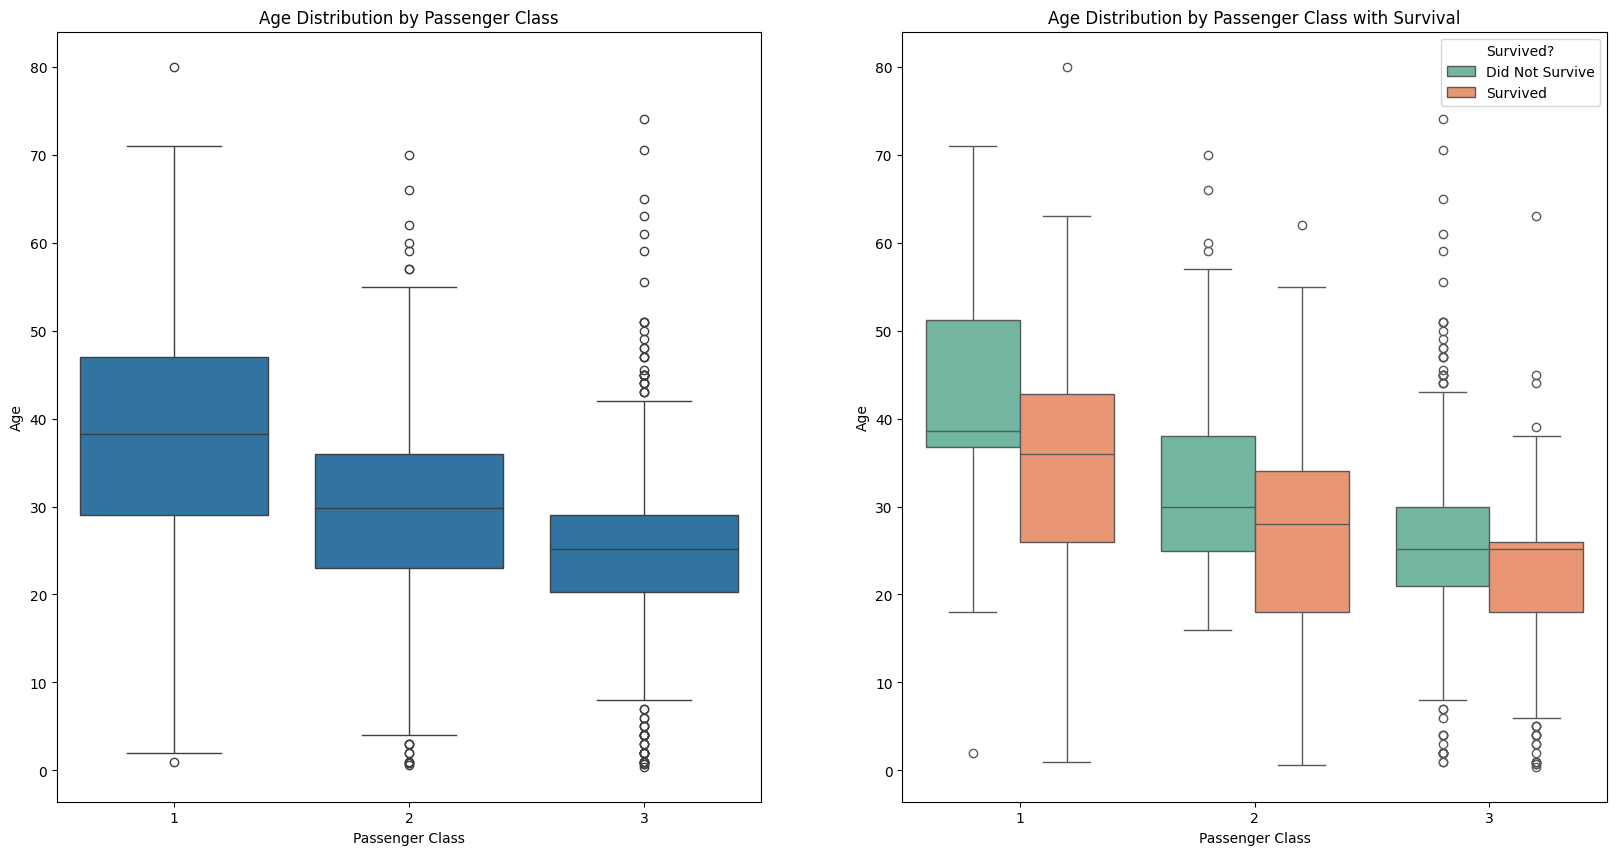

In [170]:
#Visualize the survival rate by age and pclass
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

#Boxplot of age distribution by pclass
sns.boxplot(ax=axes[0], data=titanic, x='pclass', y='age')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Age')
axes[0].set_title('Age Distribution by Passenger Class')

#Boxplot of age distribution by pclass with survival
sns.boxplot(ax=axes[1], data=titanic, x='pclass', y='age', hue='survived', palette='Set2')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Age')
axes[1].set_title('Age Distribution by Passenger Class with Survival')

#Set the y-axis limits to be the same for both plots
y_min, y_max = axes[0].get_ylim()
axes[0].set_ylim(y_min, y_max)
#Set the legend for the second plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ['Did Not Survive', 'Survived'], title='Survived?')
plt.show()


The above plot illustrates the age distribution of Titanic passengers by class and whether they survived. In the legend, green represents passengers who did not survive (Survived = 0) and orange represents passengers who survived (Survived = 1). The plot is clearly labeled with the x-axis representing the Passenger Class (Pclass) and the y-axis representing the Age of the passengers. From the visual, a viewer can extrapolate information comparing the age distribution of passengers in each class to the age distribution of passengers who survived. From a design perspective, the plot is purposeful with its use of color to differentiate between survival status and the use of a legend to provide added context to the color scheme. The axes are distinct and are scaled appropriately between graphs, making it easier for viewers to compare overall age distribution between classes and age distribution of survival status with respect to passenger class.

## Misleading Visualizations

### Depature Town and Survival Rate

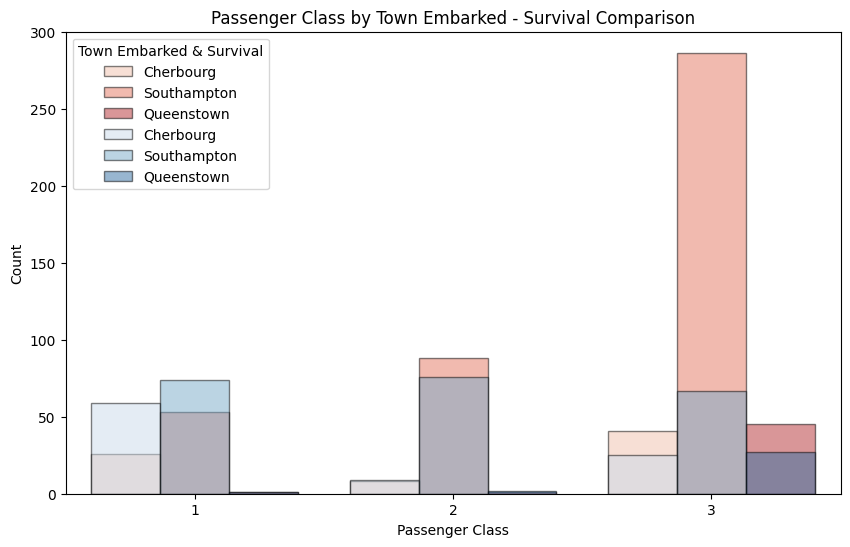

In [91]:
#Overlay the survival status on the count plot for each PClass and Embark_Town
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic[titanic['survived'] == 0], x='pclass', hue='embark_town', hue_order=['Cherbourg', 'Southampton', 'Queenstown'], alpha=0.5, palette='Reds', edgecolor = 'black')
sns.countplot(data=titanic[titanic['survived'] == 1], x='pclass', hue='embark_town', hue_order=['Cherbourg', 'Southampton', 'Queenstown'], alpha=0.5, palette='Blues', edgecolor = 'black')
plt.title('Passenger Class by Town Embarked - Survival Comparison')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.ylim(0, 300)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3] + handles[3:], labels[:3] + labels[3:], title="Town Embarked & Survival")
plt.show()

While the plot above is visually appealing, and conveys information that is true, it lacks the ability to be readily interpretable. The legend is ambiguous in determining whether a passenger from a city survived or not. The lack of clarification on the color scheme could lead to viewers assuming that more people survived than actually did. Due to the overlapped bars, one could interpret the plot as a stacked bar chart, when in actuality two countplots are used to display whether a passenger survived or not from a specific city with respect to their passenger class. As a solution, two separate countplots could be used to display the survivor status of passengers of a specific class and embark city. Additionally, a table could provide an accurate display of the values of the countplot.

### Distribution of Survival by 'Deck'

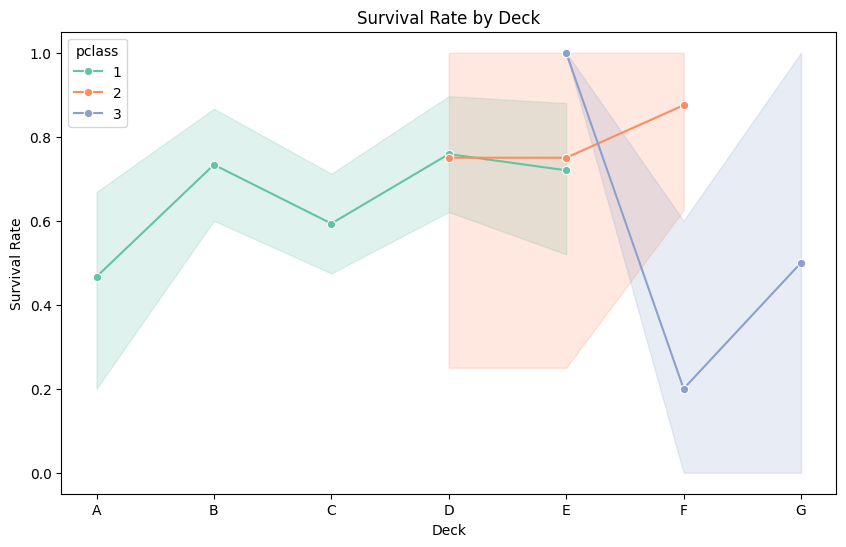

In [94]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=titanic, x='deck', y='survived', hue='pclass', estimator=np.mean, marker="o", palette='Set2')
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()

In [178]:
#Calculate the survival rate for each PClass where deck is not null
deck_survival_rate = titanic[titanic['deck'].notnull()].groupby(['pclass'])['survived'].mean().reset_index()
#Round the survival rate to two decimal places
deck_survival_rate['survived'] = np.round(deck_survival_rate['survived'], 2)*100
#Count the number of passengers in each PClass where deck is not null
deck_survival_rate['count'] = titanic[titanic['deck'].notnull()].groupby(['pclass'])['survived'].count().values
deck_survival_rate


,pclass,survived,count
0,1,66.0,173
1,2,81.0,16
2,3,50.0,12


In [179]:
#Calculate the actual survival rate for the dataset by PClass
survival_rate = titanic.groupby(['pclass'])['survived'].mean().reset_index()
#Round the survival rate to two decimal places
survival_rate['survived'] = np.round(survival_rate['survived'], 2)*100
#Count the number of passengers in each PClass
survival_rate['count'] = titanic.groupby(['pclass'])['survived'].count().values
survival_rate

,pclass,survived,count
0,1,63.0,214
1,2,47.0,184
2,3,24.0,491


This lineplot deliberately misrepresents the data by examining the 'Deck' feature to illustrate survival by Passenger Class. Upon importing the data from the seaborn, the 'deck' feature is missing approximately 77% of values; only 23% of the data is being represented. From the 23% of values present in 'deck', 173 passengers are first class, followed by 16 in second class, and 12 in third class. When compared to the full dataset, first class is overrepresented while second and third class are severely underrepresented; In total first class had 214 passengers, while second and third class had 184 and 491 passengers, respectively. Using 'deck' as a key visualization feature in this way distorts the reality of the dataset, skewing the observed survival rate of passengers by passenger class. Based on the full data set, the survival rate of passengers in first class is 63%, second class is 47%, and third class is 24%. The cherry picked data illustrates survival rates of 66%, 81%, and 50% for first, second, and third class respectively. From a design perspective, the plot leverages color, and axis labeling, appropriately to differentiate between passenger classes, but the plot itself is not a good fit for the data. Since the 'deck' feature is not continuous in nature, a lineplot is not an appropriate visualization method; a barplot or countplot would be more appropriate. From this visualization, a viewer could easily conclude that the survival rate of passengers on the Titanic was much higher across all passenger classes than it actually was. Additionally, the associated plot could lead a viewer to assume that there is a relationship between the survival rates of each cabin.